<a href="https://colab.research.google.com/github/rpdieego/Reinforcement_Learning/blob/master/Reinforcement_Learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning

### Multi-Armed Bandit - Explore-Exploit Dilemma

#### Epsilon-Greedy Algorithm

In [0]:
# import relevant libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Hyper-parameters

#number of trials
NUM_TRIALS = 1000000

#Minimum Value of Epsilon
EPS_min = 0.00001

# History of Decaying Epsilon
EPS_rec = np.zeros(NUM_TRIALS)

#Decaying Epsilon Constant
k = 0.000001

#Bandit Probabilities
BANDIT_PROBABILITIES = [0.69, 0.7, 0.75]


In [0]:
# Bandit Class

class Bandit:
  def __init__(self,p):
    # p: the win rate
    self.p = p
    # estimated win rate
    self.p_estimate = 0.
    # number of samples collected so far
    self.N = 0
  
  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
  

In [0]:
# Experiment

def experiment(EPS_0):

  '''


  '''

  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0

  # Knowing optimal J is only possible in simulations, as in real applications 
  # the winrate of bandits aren't known
  optimal_j = np.argmax([b.p for b in bandits])
  print("Optimal j: {} \n".format( optimal_j))


  #Iteratations with Bandits
  for i in range(NUM_TRIALS):

    # Calculate Value of Decaying Epsilon
    EPS = max((EPS_0 - k*i), EPS_min)

    #use epsilon-greedy to select the next bandit
    if np.random.random() < EPS:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    # check if select j is equal to optimal j
    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update epsilon log
    EPS_rec[i] = EPS

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)  

  # print mean estimates for each bandit
  for b in bandits:
    print("Mean Estimate", b.p_estimate)

  print('\n')

  #print total reward
  print('Total Reward Earned: {}'.format(rewards.sum()))
  print('Overall Win Rate: {}'.format(rewards.sum() / NUM_TRIALS))
  print('Number of Times Explored: {}'.format(num_times_explored))
  print('Number of Times Exploited: {}'.format(num_times_exploited))
  print('Number of Times Selected Optimal Bandit: {}'.format(num_optimal))
  print('\n')


  sns.set()

  # plot the results
  plt.figure(figsize=(6,7))
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  return win_rates







Optimal j: 2 

Mean Estimate 0.6904619076184763
Mean Estimate 0.6987861531545005
Mean Estimate 0.7503838712260353


Total Reward Earned: 749640.0
Overall Win Rate: 0.74964
Number of Times Explored: 19884
Number of Times Exploited: 980116
Number of Times Selected Optimal Bandit: 986659




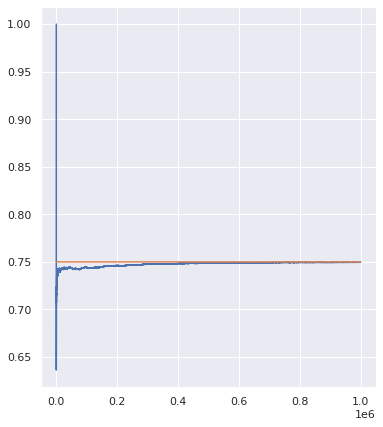

In [0]:
# Run Experiment - Initial Epsilon = 0.2
win_rate_1 = experiment(0.2)

Optimal j: 2 

Mean Estimate 0.6995467875233279
Mean Estimate 0.6998113715979523
Mean Estimate 0.7504730297479926


Total Reward Earned: 750094.0
Overall Win Rate: 0.750094
Number of Times Explored: 11147
Number of Times Exploited: 988853
Number of Times Selected Optimal Bandit: 992538




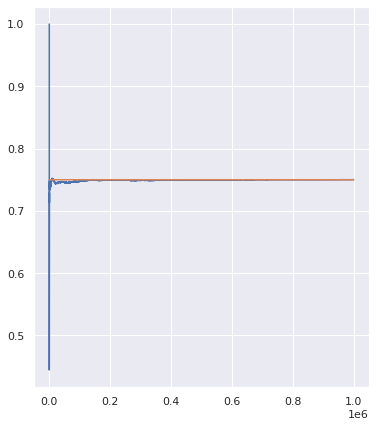

In [0]:
# Run Experiment - Initial Epsilon = 0.15
win_rate_2 = experiment(0.15)

Optimal j: 2 

Mean Estimate 0.7
Mean Estimate 0.7054565701559019
Mean Estimate 0.7494008454402196


Total Reward Earned: 749233.0
Overall Win Rate: 0.749233
Number of Times Explored: 5123
Number of Times Exploited: 994877
Number of Times Selected Optimal Bandit: 996404




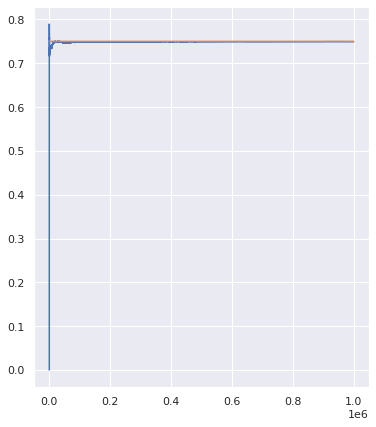

In [0]:
# Run Experiment - Initial Epsilon = 0.1
win_rate_3 = experiment(0.1)

Optimal j: 2 

Mean Estimate 0.6561844863731654
Mean Estimate 0.7162471395881009
Mean Estimate 0.7496377606145964


Total Reward Earned: 749564.0
Overall Win Rate: 0.749564
Number of Times Explored: 1301
Number of Times Exploited: 998699
Number of Times Selected Optimal Bandit: 998649




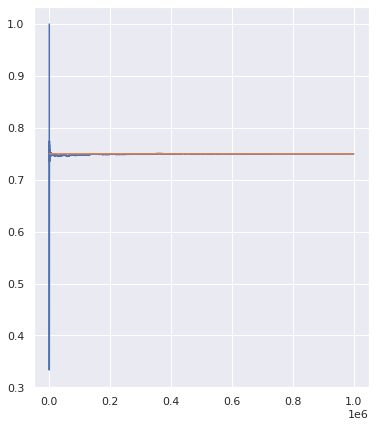

In [0]:
# Run Experiment - Initial Epsilon = 0.05
win_rate_4 = experiment(0.05)

Optimal j: 2 

Mean Estimate 0.7107843137254897
Mean Estimate 0.6886363636363634
Mean Estimate 0.7500910772334929


Total Reward Earned: 750048.0
Overall Win Rate: 0.750048
Number of Times Explored: 1265
Number of Times Exploited: 998735
Number of Times Selected Optimal Bandit: 999152




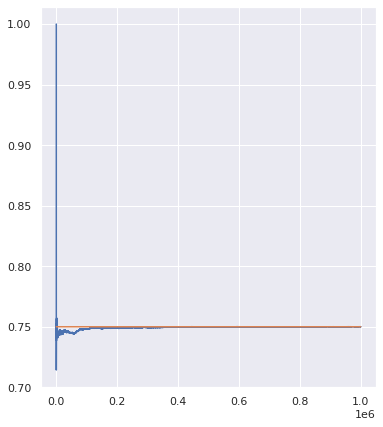

In [0]:
# Run Experiment - Initial Epsilon = 0.05
win_rate_4 = experiment(0.05)

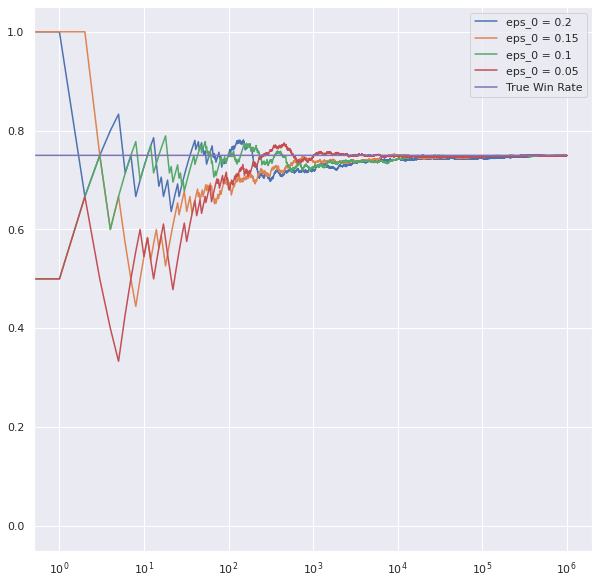

In [0]:
# Compare Epsilons - Log Scale Plot

plt.figure(figsize=(10,10))
plt.plot(win_rate_1, label='eps_0 = 0.2')
plt.plot(win_rate_2, label='eps_0 = 0.15')
plt.plot(win_rate_3, label='eps_0 = 0.1')
plt.plot(win_rate_4, label='eps_0 = 0.05')
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES), label = 'True Win Rate')
plt.legend()
plt.xscale('log')
plt.show();

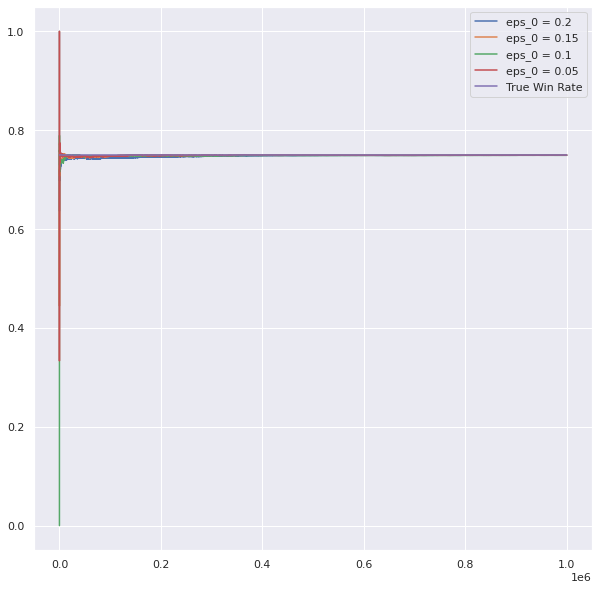

In [0]:
# Compare Epsilons - Linear Scale Plot

plt.figure(figsize=(10,10))
plt.plot(win_rate_1, label='eps_0 = 0.2')
plt.plot(win_rate_2, label='eps_0 = 0.15')
plt.plot(win_rate_3, label='eps_0 = 0.1')
plt.plot(win_rate_4, label='eps_0 = 0.05')
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES), label = 'True Win Rate')
plt.legend()
plt.show();

#### Optimistic Initial Values

In [0]:
# Inital Definitions

NUM_TRIALS = 10000

BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self,p):
    # 'p' is the bandit's win rate
    self.p = p
    # chosen initial value (Hyperparameter)
    self.p_estimate = 5.
    # number of samples collected so far
    self.N = 1.

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


In [0]:
def experiment_opt_init_values():
  # define bandits
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  # log of rewards
  rewards = np.zeros(NUM_TRIALS)

  #iterate trough trials
  for i in range(NUM_TRIALS):
    # greedy method to select the optimistic bandit
    j = np.argmax([b.p_estimate for b in bandits])

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    #update the distribution for the bandit whose arm was just pulled
    bandits[j].update(x)


  # print mean estimates for each bandit
  for b in bandits:
    print("Mean Estimate", b.p_estimate)

  print('\n')

  #print total reward
  print('Total Reward Earned: {}'.format(rewards.sum()))
  print('Overall Win Rate: {}'.format(rewards.sum() / NUM_TRIALS))
  print('Number of Times Selected Each Bandit:',[b.N for b in bandits])
  print('\n')

  #plot the results
  sns.set()

  plt.figure(figsize=(6,7))
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0,1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  


Mean Estimate 0.6666666666666666
Mean Estimate 0.696969696969697
Mean Estimate 0.7542679252862032


Total Reward Earned: 7527.0
Overall Win Rate: 0.7527
Number of Times Selected Each Bandit: [12.0, 33.0, 9958.0]




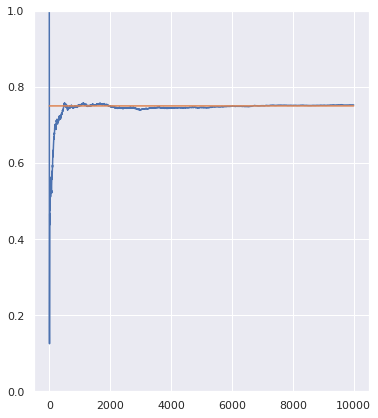

In [0]:
experiment_opt_init_values()

#### Upper Confidence Interval 1 (UCB 1)

In [0]:
# inital definitions

NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
# Bandit Class

class Bandit:
  def __init__(self,p):
    # p: the win rate
    self.p = p
    # estimated win rate
    self.p_estimate = 0.
    # number of samples collected so far
    self.N = 0
  
  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [0]:
def ucb(mean, n , nj):
  return mean + np.sqrt(2*np.log(n) / nj)

In [0]:
def run_experiment_ucb():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.empty(NUM_TRIALS)
  total_plays = 0

  # initialization: play each bandit once
  for j in range(len(bandits)):
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

  for i in range(NUM_TRIALS):
    j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)

    #update rewards log
    rewards[i] = x

  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  #plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  #plt moving average crt linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print('Total reward earned: {}'.format(rewards.sum()))
  print('Overall Win Rate: {}'.format(rewards.sum()/NUM_TRIALS))
  print('Number of Times Each Bandit was Selected', [b.N for b in bandits])

  return cumulative_average

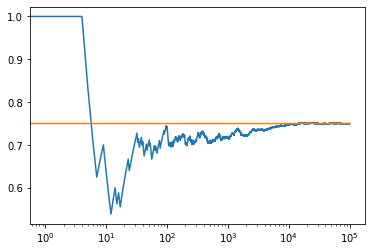

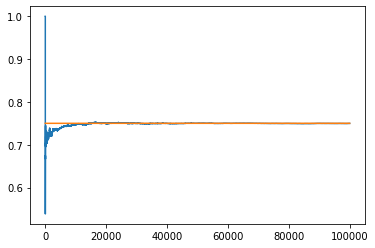

0.19444444444444442
0.495268138801262
0.7509888168329831
Total reward earned: 74979.0
Overall Win Rate: 0.74979
Number of Times Each Bandit was Selected [72.0, 317.0, 99614.0]


array([1.       , 1.       , 1.       , ..., 0.749785 , 0.7497875,
       0.74979  ])

In [0]:
run_experiment_ucb()

#### Bayesian Bandits / Thompson Sampling

In [0]:
# import relevant packages

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [0]:
# initial definitions

NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


In [0]:
# class bandit

class Bandit:
  def __init__(self,p):
    self.p = p
    self.a = 1
    self.b = 1
    self.N = 0

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a,self.b)
  
  def update(self, x):
    self.a += x
    self.b += 1-x 
    self.N += 1



In [0]:
def plot(bandits, trial):
  x = np.linspace(0,1,200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y , label=f'real p: {b.p:.4f}, win rate = {b.a -1} / {b.N}')
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [0]:
def experiment_bayesian_bandits():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]

  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    # Thompson Sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posterior distribution
    if i in sample_points:
      plot(bandits, i)

    # pull the arm of the bandit which has the largest sample
    x = bandits[j].pull()

    # update rewards
    rewards[i] = x

    #update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

  #print total reward
  print('Total Reward earned: {}'.format(rewards.sum()))
  print('Overall Win Rate: {}'.format(rewards.sum() / NUM_TRIALS))
  print('Number of Times Each Bandit was Selected', [b.N for b in bandits])

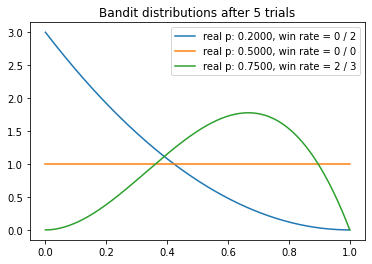

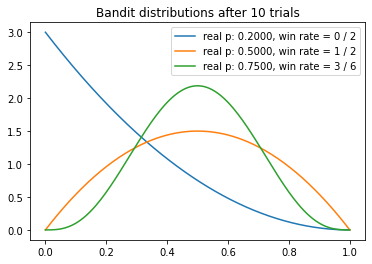

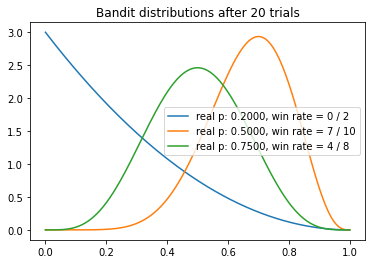

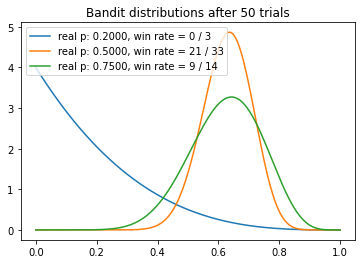

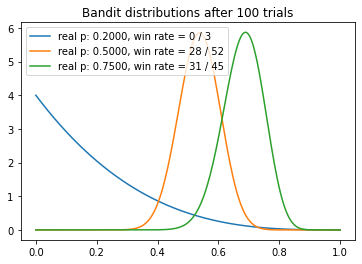

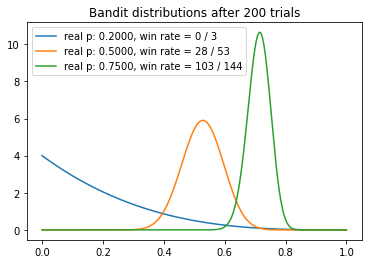

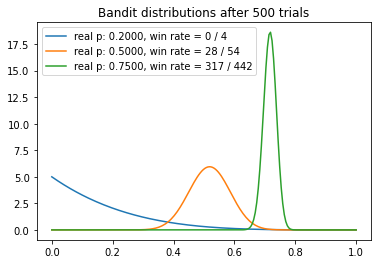

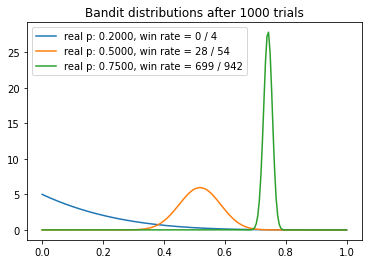

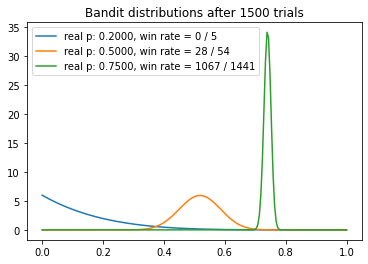

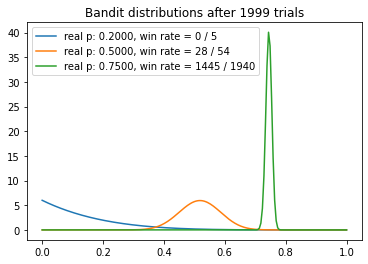

Total Reward earned: 1473.0
Overall Win Rate: 0.7365
Number of Times Each Bandit was Selected [5, 54, 1941]


In [0]:
experiment_bayesian_bandits()

#### Thompson Sampling with Gaussian Reward


In [0]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [0]:
# initial definitions

np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1,2,3]

In [0]:
#class Bandit

class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1)
    self.predicted_mean = 0
    self.lambda_ = 1
    self.sum_x = 0 # for convenience
    self.tau = 1
    self.N = 0

  def pull(self):
    return np.random.randn() / np.sqrt(self.tau) + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau*self.sum_x / self.lambda_
    self.N += 1
    

In [0]:
def plot(bandits, trial):
  x = np.linspace(-3,6,200)
  for b in bandits:
    y = norm.pdf(x, b.predicted_mean, np.sqrt(1. / b.lambda_))
    plt.plot(x,y, label =f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
  plt.title(f"Bandit distribution after {trial} trials")
  plt.legend()
  plt.show()

  

In [0]:
def run_experiment_gaussian_reward():
  bandits = [Bandit(m) for m in BANDIT_MEANS]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  rewards = np.empty(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posterior distribution
    if i in sample_points:
      plot(bandits, i)

    # pull the arm of the bandit which has the largest sample
    x = bandits[j].pull()

    # update rewards
    rewards[i] = x

    #update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

  #print total reward
  print('Total Reward earned: {}'.format(rewards.sum()))
  print('Overall Win Rate: {}'.format(rewards.sum() / NUM_TRIALS))
  print('Number of Times Each Bandit was Selected', [b.N for b in bandits])

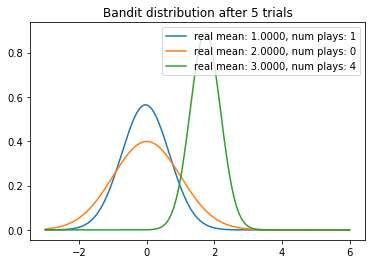

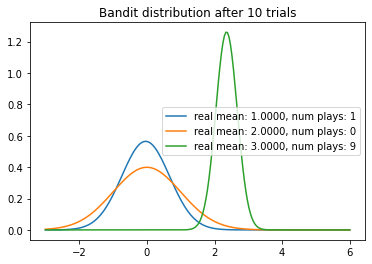

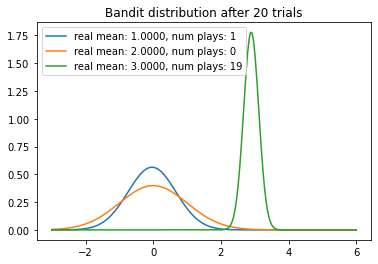

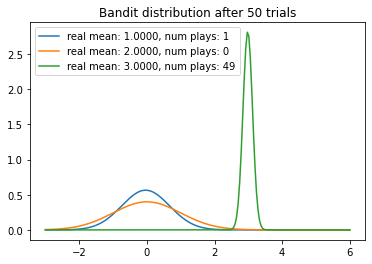

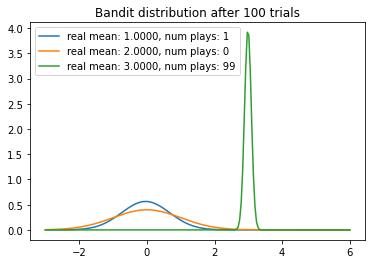

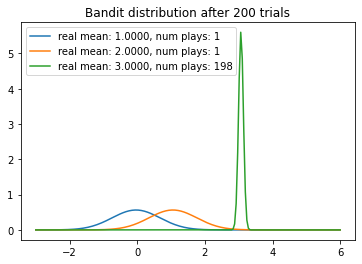

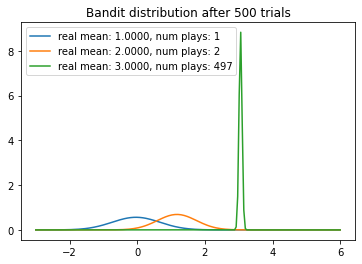

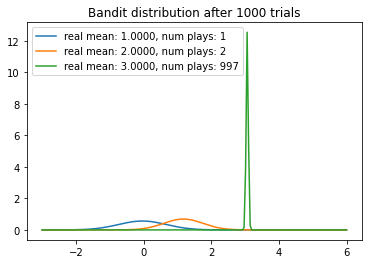

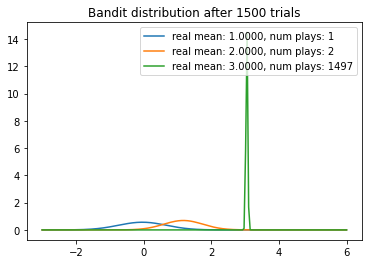

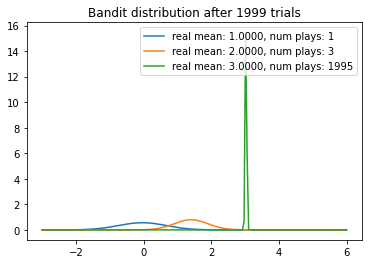

Total Reward earned: 6051.386162473897
Overall Win Rate: 3.0256930812369482
Number of Times Each Bandit was Selected [1, 3, 1996]


In [0]:
run_experiment_gaussian_reward()